Complete the exercises below For **Assignment #2**.

First, load the `Tidyverse` package which imports data visualization and wrangling libraries that we need.

In [1]:
# uncomment the code below and execute this cell
library('tidyverse')

Warning message:
“Your system is mis-configured: ‘/var/db/timezone/localtime’ is not a symlink”
Warning message:
“‘/var/db/timezone/localtime’ is not identical to any known timezone file”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


If you are unable to load the `Tidyverse` package, you may not have it installed. Please refer to the assignment `README` for instructions to update your `data730` environment to include the `Tidyverse` package.

## Data visualization

Let's work with the [Palmer Penguins data](https://allisonhorst.github.io/palmerpenguins/).

In [2]:
# uncomment the code below and execute this cell
library('palmerpenguins')
glimpse(penguins)

Rows: 344
Columns: 8
$ species           <fct> Adelie, Adelie, Adelie, Adelie, Adelie, Adelie, Adel…
$ island            <fct> Torgersen, Torgersen, Torgersen, Torgersen, Torgerse…
$ bill_length_mm    <dbl> 39.1, 39.5, 40.3, NA, 36.7, 39.3, 38.9, 39.2, 34.1, …
$ bill_depth_mm     <dbl> 18.7, 17.4, 18.0, NA, 19.3, 20.6, 17.8, 19.6, 18.1, …
$ flipper_length_mm <int> 181, 186, 195, NA, 193, 190, 181, 195, 193, 190, 186…
$ body_mass_g       <int> 3750, 3800, 3250, NA, 3450, 3650, 3625, 4675, 3475, …
$ sex               <fct> male, female, female, NA, female, male, female, male…
$ year              <int> 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007…


We now have a data frame called `penguins` available. Use this table for the following exercises.

### Bar chart

In the cell below make a bar chart that shows how many penguins are in the data from each island. Encode the penguin species as the fill attribute of the bars.

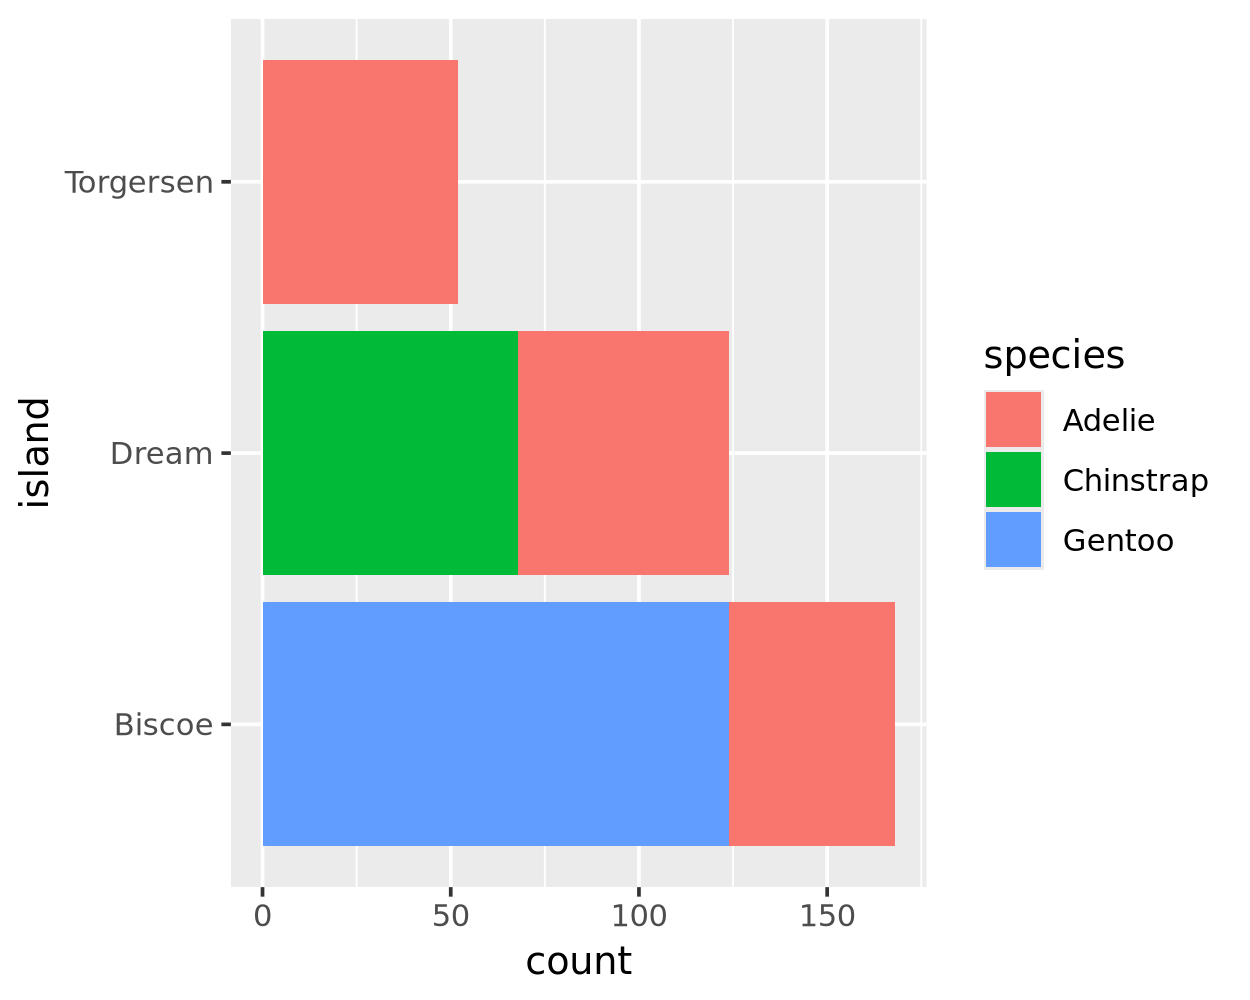

In [41]:
ggplot(penguins, aes(fill = species, y = island)) + geom_bar()

**In which islands were *Adelie* penguins observed?** Answer using a [markdown list](https://www.markdownguide.org/basic-syntax/#lists-1) in the cell below. 

⚠️ Remember to switch the cell type to `Markdown`.

<ol>
  <li>Torgersen</li>
  <li>Dream</li>
  <li>Biscoe</li>
</ol>

### Scatter chart

Make a scatter chart of bill depth versus bill length. Color the points by penguin species. Add a `scale` modification to your chart to adjust the color palette (e.g. add `scale_color_brewer(palette = "Set2")`).

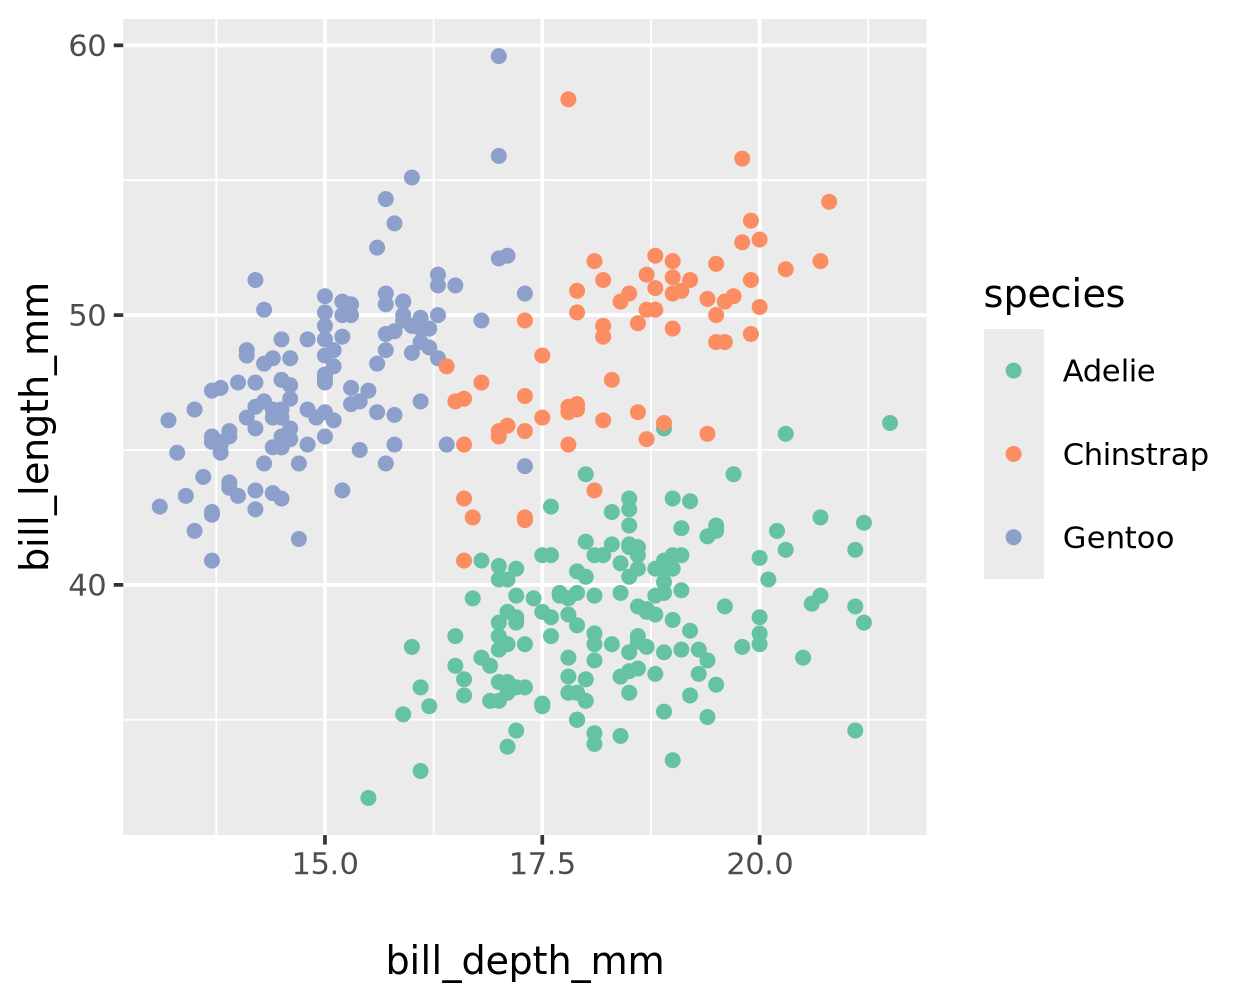

In [50]:
ggplot(penguins, aes(x = bill_depth_mm, y = bill_length_mm, color = species)) + geom_point(na.rm = TRUE) + scale_color_brewer(palette = "Set2")

### Histogram

Make a histogram of penguin body mass. 
- Facet your chart by the `sex` column using the `facet_wrap` function and setting the `ncol` parameter to `1`.
- In your `geom_histogram` layer, set the `position` argument to `"identity"` and set `alpha`to a value between `0` and `1`.
- Map penguin species to the `fill` property.
- Adjust the `fill` scale palette similarly to how we adjusted the `color` scale palette above. I.e. change to the [ColorBrewer](https://colorbrewer2.org/) `"Set2"` palette.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


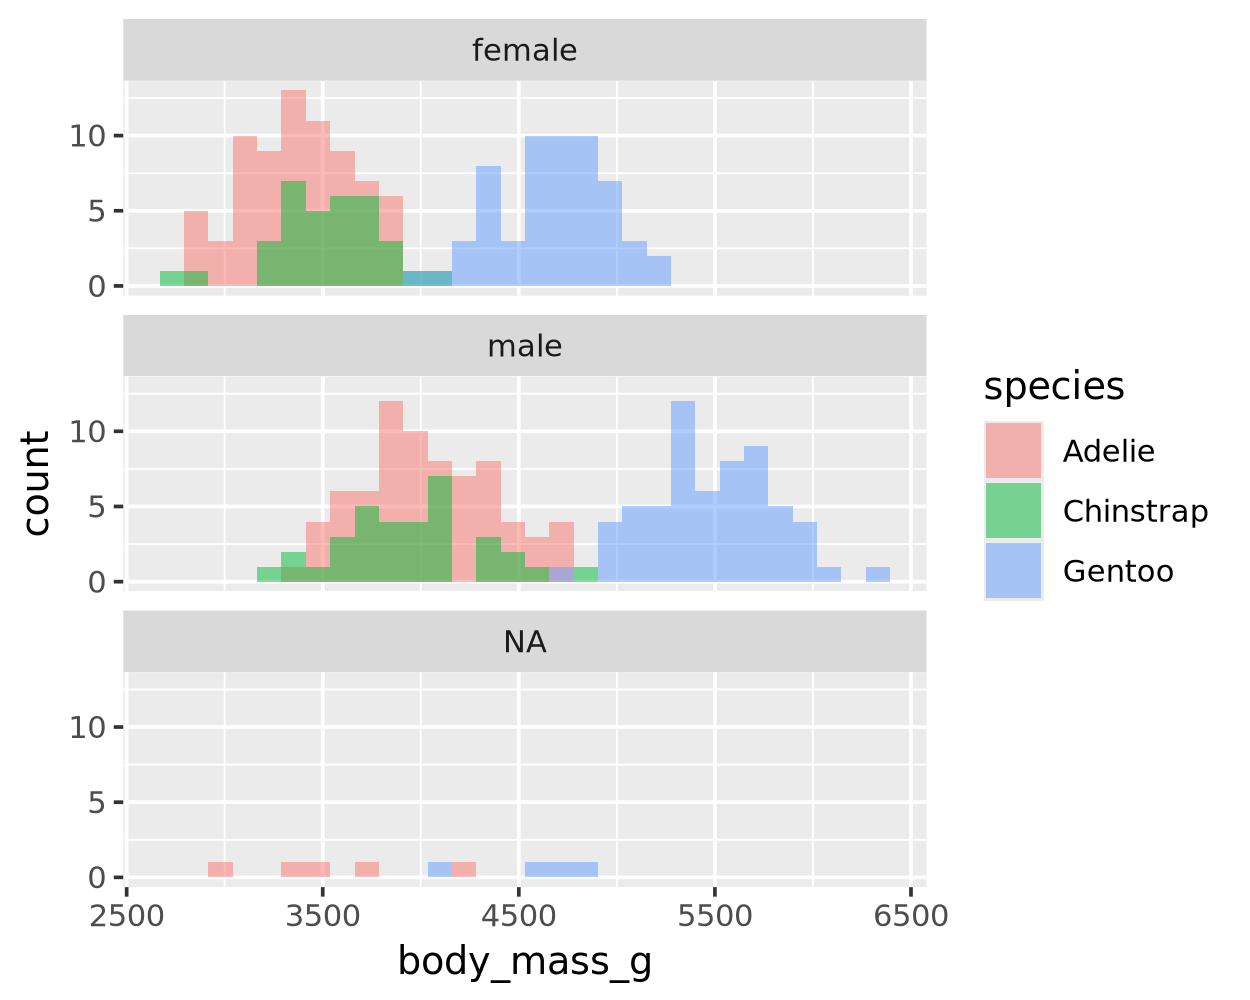

In [60]:
ggplot(penguins, aes(x=body_mass_g, fill=species)) + 
    facet_wrap(vars(sex), ncol=1) + 
    geom_histogram(position = "identity", alpha=0.5, na.rm = TRUE) + 
    scale_color_brewer(palette = "Set2")

What happens when you don't have `position = "identity"` in your `geom_histogram` layer? Answer below in a `Markdown` cell.

Position sets the position adjustment of the layer or geom, this is considered jitter plotting and When you dont have the position = "identity" it would have mutiple layers of this data on top of each other. I actually ran this to compare the scatter plots and the looks of it the histogram count grew. 

## Data wrangling

First we are going to bring in a data set to practice with called `txhousing`. You can find some information about `txhousing` [here](https://ggplot2.tidyverse.org/reference/txhousing.html).

In [98]:
# uncomment the next two lines and execute this cell
data(txhousing)
glimpse(txhousing)

Rows: 8,602
Columns: 9
$ city      <chr> "Abilene", "Abilene", "Abilene", "Abilene", "Abilene", "Abil…
$ year      <int> 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, …
$ month     <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 1, 2, 3, 4, 5, 6, 7, …
$ sales     <dbl> 72, 98, 130, 98, 141, 156, 152, 131, 104, 101, 100, 92, 75, …
$ volume    <dbl> 5380000, 6505000, 9285000, 9730000, 10590000, 13910000, 1263…
$ median    <dbl> 71400, 58700, 58100, 68600, 67300, 66900, 73500, 75000, 6450…
$ listings  <dbl> 701, 746, 784, 785, 794, 780, 742, 765, 771, 764, 721, 658, …
$ inventory <dbl> 6.3, 6.6, 6.8, 6.9, 6.8, 6.6, 6.2, 6.4, 6.5, 6.6, 6.2, 5.7, …
$ date      <dbl> 2000.000, 2000.083, 2000.167, 2000.250, 2000.333, 2000.417, …


Write a code chunk to remove the inventory variable. Save the results in a data frame called `txhousing`. Use `glimpse` or `head` to confirm you have removed the variable.

In [110]:
txhousing $ inventory <- NULL
txhousing |> head()

ERROR: Error in txhousing | inventory <- NULL: could not find function "|<-"


Make a data set called `dallas_sub` that includes data only from the city of Dallas in 2012 & 2013.

In [107]:
dallas_sub = txhousing[(txhousing$city == 'Dallas') &
                        ((txhousing$year == 2012) | (txhousing$year == 2013)),]
dallas_sub

city,year,month,sales,volume,median,listings,date
<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Dallas,2012,1,2555,509458081,150800,16721,2012.000
Dallas,2012,2,3085,634067291,157100,17173,2012.083
Dallas,2012,3,4068,898320563,167300,17433,2012.167
Dallas,2012,4,4291,983333297,168700,17632,2012.250
Dallas,2012,5,5004,1175419749,175100,17726,2012.333
Dallas,2012,6,5196,1209024869,177900,17587,2012.417
Dallas,2012,7,4859,1117428758,176000,17314,2012.500
Dallas,2012,8,5264,1168296112,174200,16611,2012.583
Dallas,2012,9,4151,921678400,173500,15994,2012.667


Add a column to the `dallas_sub` data set called `prct_sold` that calculates the percentage of listings that were sold (`sales/listings * 100`). Be sure to save the results also as a data frame called `dallas_sub`.

In [108]:
dallas_sub $ prct_sold = (dallas_sub$sales / dallas_sub$listings * 100)
dallas_sub

city,year,month,sales,volume,median,listings,date,prct_sold
<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Dallas,2012,1,2555,509458081,150800,16721,2012.000,15.28019
Dallas,2012,2,3085,634067291,157100,17173,2012.083,17.96425
Dallas,2012,3,4068,898320563,167300,17433,2012.167,23.33505
Dallas,2012,4,4291,983333297,168700,17632,2012.250,24.33643
Dallas,2012,5,5004,1175419749,175100,17726,2012.333,28.22972
Dallas,2012,6,5196,1209024869,177900,17587,2012.417,29.54455
Dallas,2012,7,4859,1117428758,176000,17314,2012.500,28.06399
Dallas,2012,8,5264,1168296112,174200,16611,2012.583,31.68984
Dallas,2012,9,4151,921678400,173500,15994,2012.667,25.95348


Calculate the average percentage of listings that were sold in Dallas in each month of the year based on your `dallas_sub` data set. Save the results of the calculation in an data frame called `dallas_summary`.

In [103]:
dallas_summary = dallas_sub |> group_by(month) |> summarize(average_sales = mean(prct_sold))
dallas_summary

month,average_sales
<int>,<dbl>
1,20.54462
2,23.47328
3,32.24472
4,34.46954
5,38.20168
6,37.19150
7,37.13028
8,38.51543
9,31.77096


Use `slice_max` to see the top 3 months with the greatest average percentage of listings sold from `dallas_summary`. You do not need to save the results.

In [104]:
dallas_summary |> slice_max(order_by = average_sales, n=3)

month,average_sales
<int>,<dbl>
8,38.51543
5,38.20168
6,37.19150


Run the following code chunk. Study the code, and the output. Explain in your own words what this code chunk calculated.

In [105]:
txhousing |>
   filter(year == 2012 | year == 2013, city == "Dallas") |>
   mutate(prct_sold = sales/listings *100) |>
   group_by(month) |>
   summarize(mean_prct_sold = mean(prct_sold)) |>
   slice_max(mean_prct_sold, n = 3)

month,mean_prct_sold
<int>,<dbl>
8,38.51543
5,38.20168
6,37.19150


Txhousing is being filtered by 2012 & 2013 and the city is set to dallas. Its than creating a new column name called prct_sold which is sales divided by listing times 100 and grouping it by the month. Finally it uses summarize to calculate the mean percentage of prct_sold and displaying only the top 3 months with the highest percentage houses sold. 